# Plotting time

A snapshot in time doesn't give you much information. Is the data improving or getting worse?

To make sense of data, you need context. That's where time comes in.

In [82]:
import io
import pandas as pd
import requests

# Round values to 3 decimal places.
pd.set_option('display.float_format', '{:.3f}'.format)

url="https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1699740944"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')), encoding = "utf-8", index_col="StateName")
df.head(2)

,RegionID,SizeRank,RegionName,RegionType,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
StateName,,,,,,,,,,,,,,,,,,,,,
NaN,102001,0,United States,country,121428.348,121641.980,121906.914,122475.146,123129.114,123830.255,...,341524.687,340331.965,339460.291,339398.681,340364.872,341993.735,343935.027,345686.216,347311.245,348538.962
NY,394913,1,"New York, NY",msa,216218.985,217137.794,218065.112,219944.218,221890.098,224047.392,...,607957.914,607138.376,605781.039,606096.535,608105.121,612136.786,616308.017,619911.494,623211.985,625939.721


# Index on time

Normally, time is represented by rows in a data frame. That's not the case in our dataset, so we'll need to `transpose` it, which rotates the data by 90 degrees. This orientation makes it easier to pass the values to `matplotlib`.

In [83]:
df.transpose()

StateName,NaN,NY,CA,IL,TX,TX,VA,PA,FL,GA,...,KS,IA,SD,TX,TX,TX,AK,CO,TX,TX
RegionID,102001,394913,753899,394463,394514,394692,395209,394974,394856,394347,...,394342,753880,395186,395142,394968,753929,394743,753874,395188,394767
SizeRank,0,1,2,3,4,5,6,7,8,9,...,929,930,932,933,934,935,936,937,938,939
RegionName,United States,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA","Miami, FL","Atlanta, GA",...,"Atchison, KS","Fairfield, IA","Vermillion, SD","Sweetwater, TX","Pecos, TX","Zapata, TX","Ketchikan, AK","Craig, CO","Vernon, TX","Lamesa, TX"
RegionType,country,msa,msa,msa,msa,msa,msa,msa,msa,msa,...,msa,msa,msa,msa,msa,msa,msa,msa,msa,msa
2000-01-31,121428.348,216218.985,222303.045,152289.701,125341.331,121045.187,178709.959,120969.833,113038.655,145143.849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98973.407,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,341993.735,612136.786,855385.246,296271.601,367067.614,300811.767,529930.194,333606.827,456558.225,367104.510,...,150032.293,168679.199,235846.791,109976.883,170309.213,120377.368,386847.151,273691.861,93680.520,95043.244
2023-06-30,343935.027,616308.017,863224.274,298827.032,367882.974,301616.710,533550.033,336577.020,460130.078,368826.941,...,150078.582,168913.902,237935.574,109905.230,166070.384,119691.406,388239.179,277371.350,93642.904,93482.513
2023-07-31,345686.216,619911.494,874493.271,301362.893,368856.669,302539.658,536894.919,339469.699,463825.261,370785.393,...,150071.870,169141.700,239372.534,109839.976,161813.432,119336.614,389755.421,280306.435,93103.127,91595.111
2023-08-31,347311.245,623211.985,888127.785,303811.358,369775.451,303414.921,539609.639,342125.431,467522.389,372654.294,...,150596.629,169084.423,240028.269,109709.741,157361.417,119555.328,389345.067,282581.827,92088.769,89555.249


## The Plague Years

The years 2020 through 2022 were considered the height of the COVID-19 pandemic. Let's see how housing prices changed 
during that time. To get this date range, we'll look for any column name that `startswith` these years. 

To begin, we'll group by `StateName` and calculate the `mean` for each column. Then, we'll use the `nlargest` function
to sort and filter the last column in our report. Then, we'll `transpose` the data and plot it.

* **figsize** sets the size of the plot area
* **rot** rotates the text on the yaxis by 90 degrees
* **fontsize** reduces the font size to 8 pts
* **title** provides a chart title

Because our data has been ordered based on the final column, the **legend** is also in that order.

<Axes: title={'center': 'The Plague Years (Highest by Median)'}>

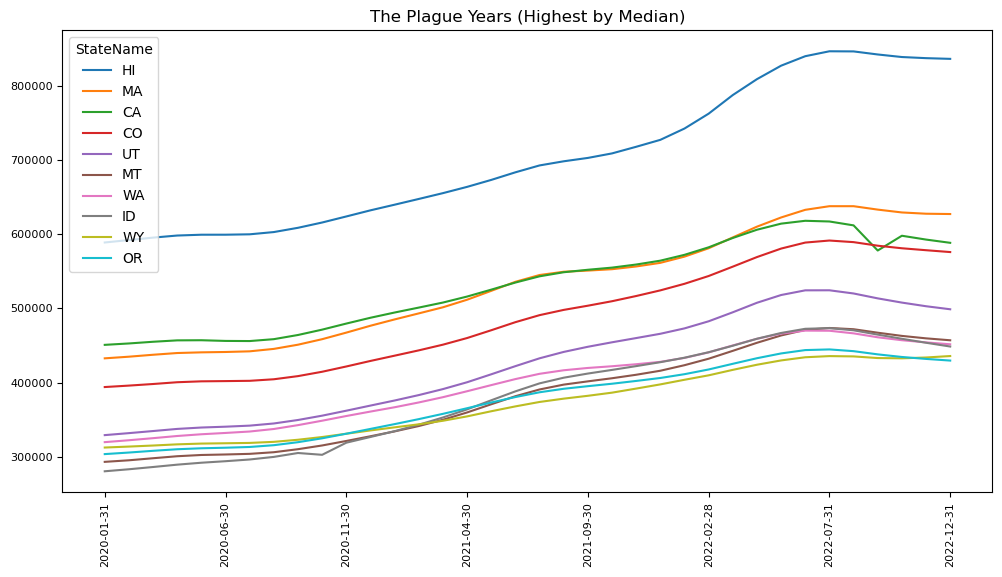

In [84]:

cols = [c for c in df.columns if c.startswith(('2020','2021','2022'))]
md = df.groupby('StateName')[cols].mean().nlargest(10, columns=cols[-1]).transpose()
md.plot(figsize=(12,6), rot=90, fontsize=8, title="The Plague Years (Highest by Median)")


## The biggest losers?

Let's see who came out on the bottom. Using the `nsmallest` function and the same columns as above, we can see who is
trailing the pack. 

Note that `nsmallest` orders the last column in ascending order, so we have to `reverse` the order of the legend to match
the order of lines in the graphic.

<Axes: title={'center': 'The Plague Years (Lowest by Median)'}>

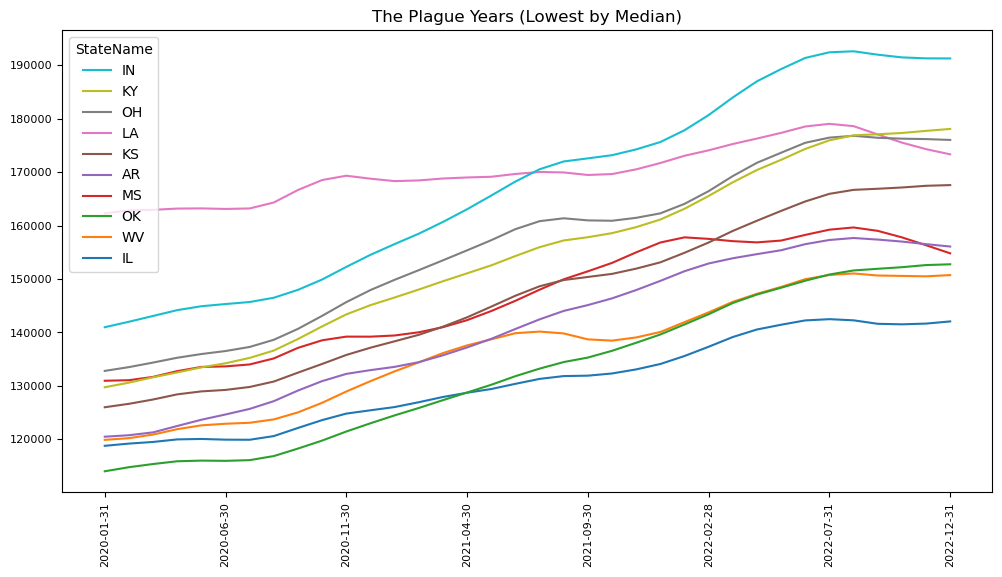

In [85]:
md = df.groupby('StateName')[cols].mean().nsmallest(10, columns=cols[-1]).transpose()
md.plot(figsize=(12,6), rot=90, fontsize=8, legend='reverse', title="The Plague Years (Lowest by Median)")

## Conclusion (Part I)

By the end of 2022, home prices had increased across the entire country, but Illinois showed the least growth...

_Or did it?_

Technically, we haven't really measure growth. We are just showing the median home price at the end of 2022. To compare 
"apples to apples" we need to convert this all to percentages.

# Year-Over-Year Revisited

Let's take one more look at our year-over-year calculation.

NOTE: I am including 2019 in my calculations to give context for the first year of the pandemic.

<Axes: title={'center': 'The Plague Years (Largest YOY)'}>

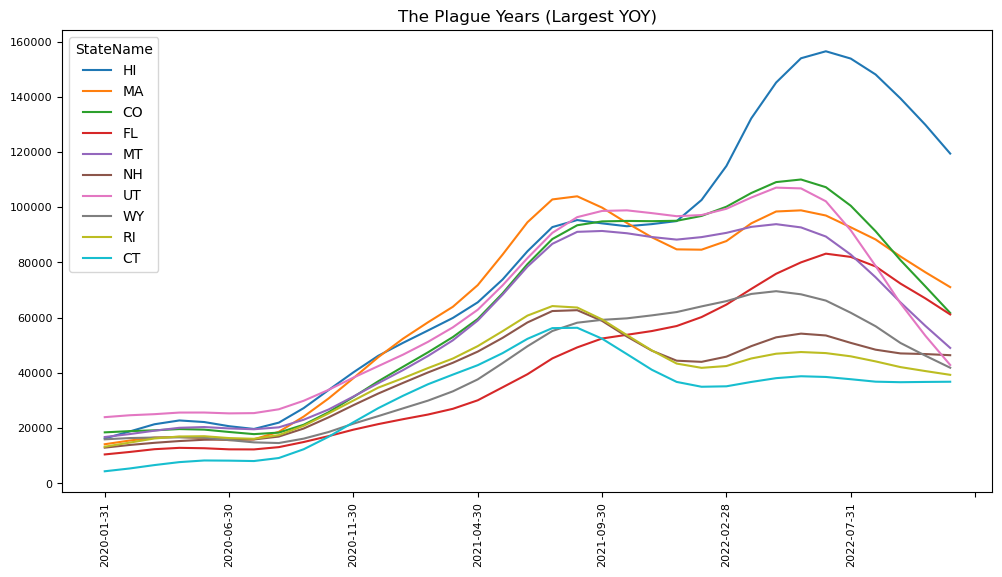

In [86]:
i = df.columns.get_loc('2019-01-31')
j = df.columns.get_loc('2022-12-31')
md = df.groupby('StateName')[df.columns[i:j]].mean()
diffs = md.diff(periods=12, axis=1).iloc[:,12:]
sorted = diffs.nlargest(10, columns=diffs.columns[-1])
sorted.transpose().plot(figsize=(12,6), rot=90, fontsize=8, title="The Plague Years (Largest YOY)")

## Smallest YOY differences

Notice that **Illinois** is no longer at the bottom of this chart. In terms of raw differences YOY, **Mississippi** has taken its place. 
This chart is also telling a much more dramatic story of gut-wrenching rise and fall. 

<Axes: title={'center': 'The Plague Years (Smallest YOY)'}>

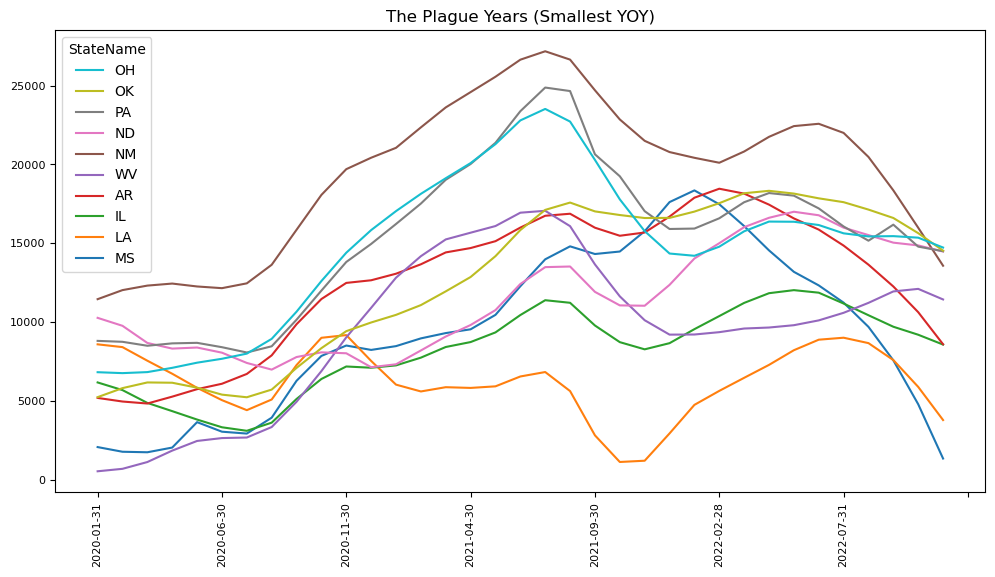

In [87]:
sorted = diffs.nsmallest(10, columns=diffs.columns[-1])
sorted.transpose().plot(figsize=(12,6), rot=90, fontsize=8, legend='reverse', title="The Plague Years (Smallest YOY)")

## Comparative differences

So far, we've been look at differences in terms of real numbers. But when comparing a large economy to a smaller one, 
it's better to use percentages. Fortunately, `diff` has a cousin called `pct_change` that will serve us nicely. 

> **Question**: Which state saw the largest percentage gain in home prices through the pandemic? **Answer**: Florida. 🥳🥳

Now that we can compare states more equitably, in terms of percentage gain, we find that **Hawaii** no longer leads the pack.

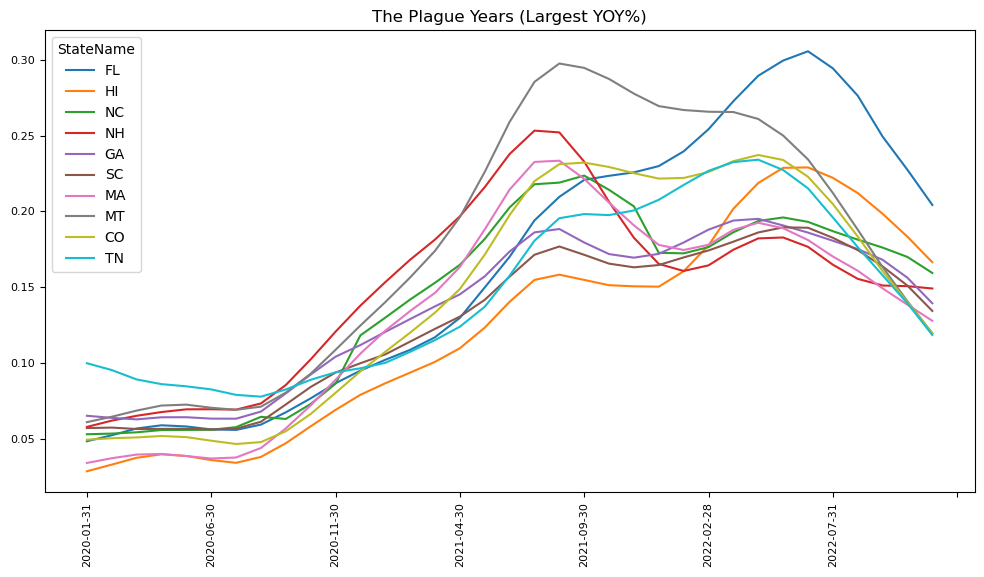

In [88]:
pcts = md.pct_change(periods=12, axis=1).iloc[:,12:]
sorted = pcts.nlargest(10, columns=pcts.columns[-1]).transpose()
sorted.plot(figsize=(12,6), rot=90, fontsize=8, title="The Plague Years (Largest YOY%)")
winners = sorted.columns

And finally, the biggest losers in terms of percentage. 

The most surprising addition to this chart is **California**, which in terms of overall percentages did not fare well through the plague years.

<Axes: title={'center': 'The Plague Years (Smallest YOY%)'}>

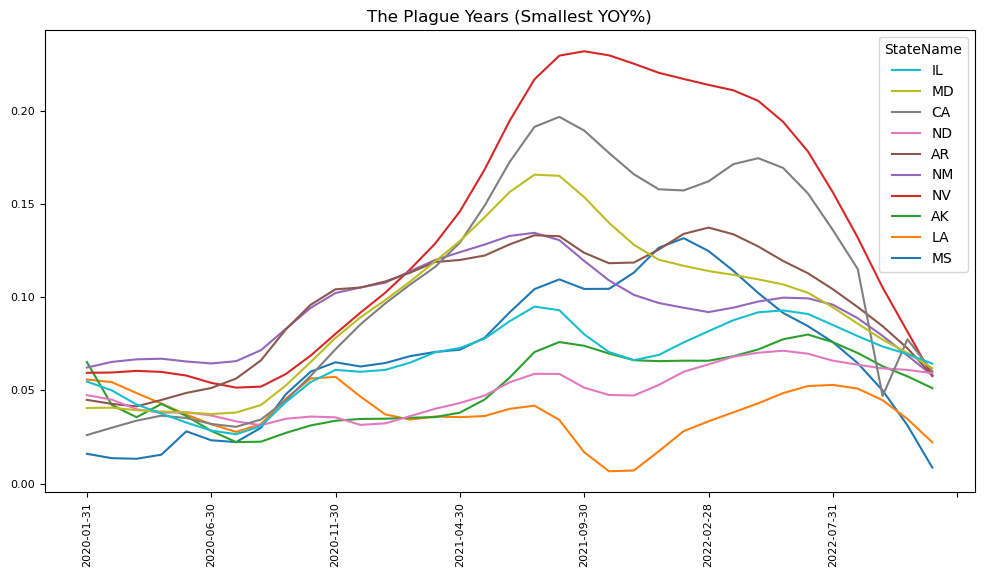

In [89]:
sorted = pcts.nsmallest(10, columns=pcts.columns[-1])
sorted.transpose().plot(figsize=(12,6), rot=90, fontsize=8, legend='reverse', title="The Plague Years (Smallest YOY%)")

# One more...

To satisfy my own curiosity, I wanted to see if these pandemic gains carried through into 2023. It's a little busy, but 
I wanted to see all 50 states (894 MSA regions). Here's what that looks like.

<Axes: title={'center': 'The Plague Years and Beyond (YOY)'}>

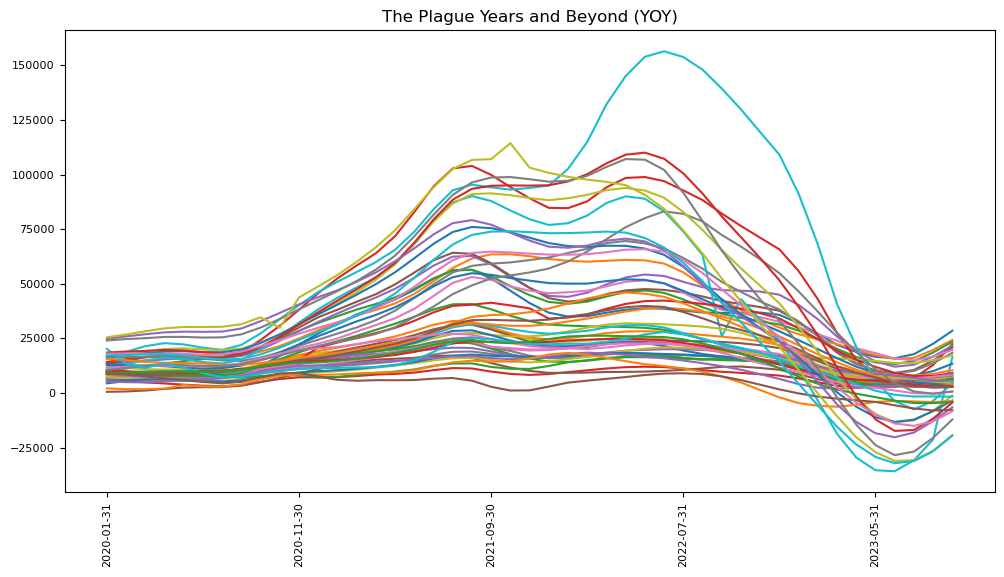

In [99]:
i = df.columns.get_loc('2019-01-31')
md = df.groupby('StateName')[df.columns[i:]].mean()
diffs = md.diff(periods=12, axis=1).iloc[:,12:]
sorted = diffs.sort_values(by=diffs.columns[-1], ascending=False)
sorted.transpose().plot(figsize=(12,6), rot=90, fontsize=8, legend=False, title="The Plague Years and Beyond (YOY)")

## The Bad News

According to this final chart, it appears that other market forces have wiped away ALL of the gains during the pandemic. 

> **Question**: Who is the clear winner of the pandemic migration and housing boom? **Answer**: No one.

